In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from matplotlib import gridspec

from create_spec import create_spec
from fit2gauss import fit2gauss

In [2]:
# import arrays
tube = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5.sav',verbose=False,python_dict=False)
frac = readsav('/Users/WilliamHenryAshfieldIV/dat/f4_vis5_si_iv_nei.sav',verbose=False,python_dict=False)
log10T,log10G = np.loadtxt('/Users/WilliamHenryAshfieldIV/dat/goft_1403.dat.txt',comments='%',unpack=True)

In [43]:
wav,spec,error = create_spec(tube,frac,log10T,log10G,time=108) #350 -> single
res = fit2gauss(wav,spec,error,verbose=True)

est params =  [3966.522702776651, 1404.2225240340158, 0.1, 46023.86803744846, 1403.362541358541, 0.1]
new init params =  [29905.574689352696, 1403.1899999999907, 0.1, 52243.87490357196, 1403.5799999999904, 0.1]
a2g = [3.29015284e+04 1.40317773e+03 1.36455005e-01 5.92670047e+04
 1.40358566e+03 1.21340689e-01]
a1g[0] = 45752.81829357738
chi2g =  17.250820349294916
a2g =  [3.29015284e+04 1.40317773e+03 1.36455005e-01 5.92670047e+04
 1.40358566e+03 1.21340689e-01]
chi1g =  1300652.2971801455
chi2g =  17.250820349294916


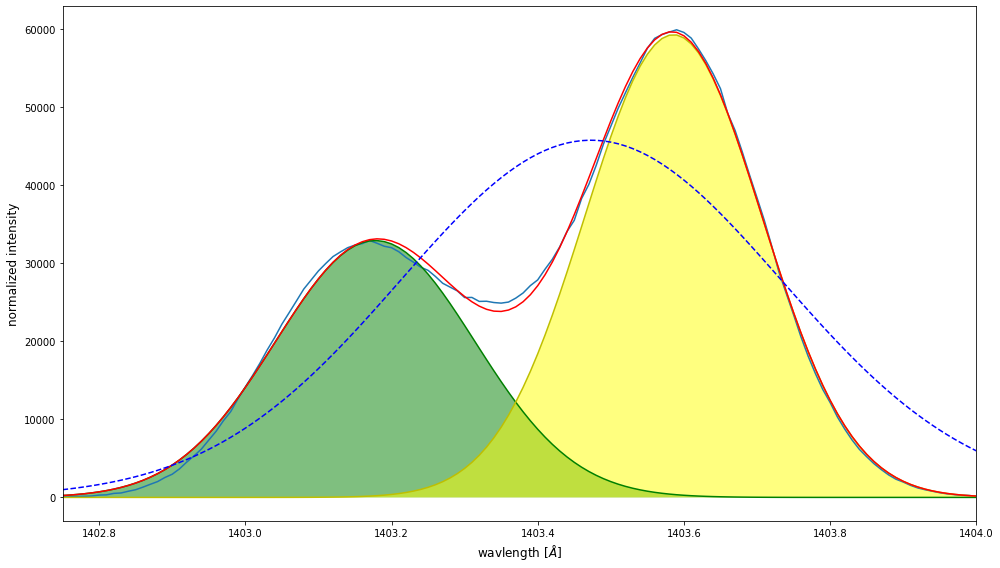

In [44]:
# extract arrays
y2a = res["y2a"]
y2b = res["y2b"]
y1g = res["y1g"]

#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec)

# peak 1
ax1.plot(wav, y2a, "g")
ax1.fill_between(wav, y2a.min(), y2a, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(wav, y2b, "y")
ax1.fill_between(wav, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 

#both
ax1.plot(wav,y2a+y2b, "r")

# single fit
ax1.plot(wav,y1g,'b--')
    
plt.xlim(1402.75,1404)
ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
ax1.set_ylabel("normalized intensity",  fontsize=12)
fig.tight_layout()

In [37]:
a1g = res["a1g"]
a2g = res["a2g"]

line = 1403
l1 = a2g[1]
l2 = a2g[4]
v1 = (l1-line)/line*3e5
v2 = (l2-line)/line*3e5


print('red velocity = ',v1,'-----', '"blue" velocity = ', v2)

red velocity =  34.24446149417086 ----- "blue" velocity =  128.18117766099485


In [38]:
# single Gaussian
line = 1403
l1 = a1g[1]
v1 = (l1-line)/line*3e5
print('red velocity = ',v1)

red velocity =  75.76437337143089


In [39]:
sig = a2g[5]
c = 300
line = 1402.77
freq = c/line*1e3
v_width = sig*freq
print('line width = ', v_width)

line width =  28.01340439137608


test for peak finding.

In [8]:
from scipy.signal import find_peaks

In [9]:
spec_sm = savgol_filter(spec, 15, 1)
peaks, _ = find_peaks(spec_sm)

(1402.75, 1404)

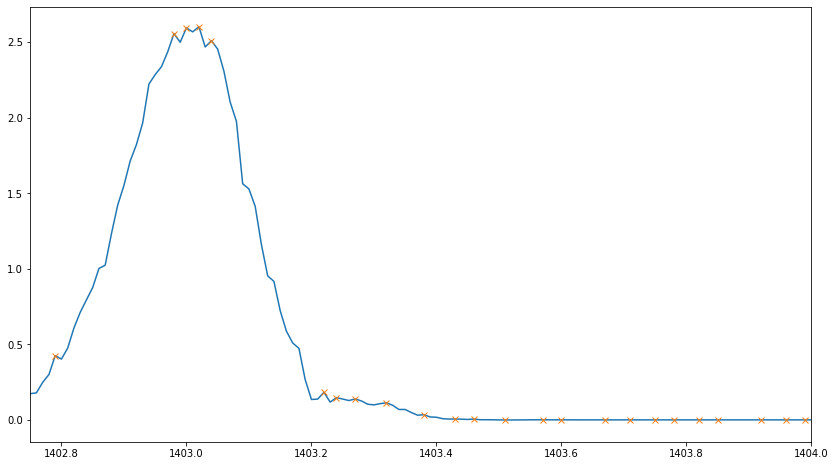

In [10]:
#plot 
fig = plt.figure(figsize=(14,8))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

# spectra
ax1.plot(wav, spec_sm)
ax1.plot(wav[peaks], spec_sm[peaks], "x")
plt.xlim(1402.75,1404)

In [11]:
pos_peaks = wav[peaks]
spec_peaks = spec_sm[peaks]
iis = np.where(spec_peaks>1)
iis = iis[0]

In [12]:
iis

array([96, 97, 98, 99])

In [13]:
amp_peaks = spec_peaks[iis]

In [14]:
pos = pos_peaks[iis]

In [15]:
print('pos =', pos, 'amps = ', amp_peaks)

pos = [1402.98 1403.   1403.02 1403.04] amps =  [2.55656917 2.59434998 2.60232826 2.50966972]


In [16]:
len(iis)

4